# Covid 19 Data Analysis

In [1]:
# importing pandas
import pandas as pd

In [2]:
# importing data

data = pd.read_csv("covid_19_data.csv")
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181



### show number of not null vaues in each column

In [3]:
# Using count-> It shows number of not null vaues in each column
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [4]:
# Find th number of null values in each column
# null value means missing value
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

### Show the heatmap of data 
- seaborn
- matplotlib

In [6]:
# importing seaborn and pyplot
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


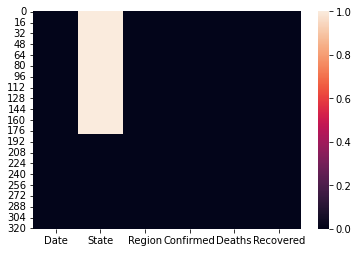

In [8]:
sns.heatmap(data.isnull())
plt.show()

### 1. Show the number of Confirmed, Death and Recovered cases in each region
- Use groupby()

In [9]:
data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [12]:
data.groupby('Region').sum().head(20)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [26]:
# for more than one column
data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

In [25]:
# for one column
data.groupby('Region')['Confirmed','Recovered'].sum()

/tmp/ipykernel_5058/4190594299.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


### Remove all the records where confirmed case is less than 10

In [34]:
# using ~ to reverse filter result
# remember the brackets()
data = data[~(data.Confirmed <10)]

In [35]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### 3. In which region maximum number of confirmed cases are recorded

In [46]:
orig_data = pd.read_csv("covid_19_data.csv")
orig_data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [48]:
orig_data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

### 4. In which region minimum number of deaths cases are recorded

In [52]:
orig_data.groupby('Region')['Deaths'].sum().sort_values().head(40)

Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

### 5. How many confiirmed, Death, and Recovered cases were reported from India till 29 April 2020?

In [56]:
# orig_data[orig_data['Region'] == 'India']
orig_data[orig_data['Region'] == 'US']

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


### 6. Sort entire data with respect to confirmed cases in ascending order

In [59]:
orig_data.sort_values(by=['Confirmed'],ascending=True).head()

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
272,4/29/2020,Northwest Territories,Canada,5,0,0
288,4/29/2020,Saint Barthelemy,France,6,0,6
178,4/29/2020,NaN,Yemen,6,0,1


### 7. Sort entire data with respect to Recovered cases in descending order

In [61]:
orig_data.sort_values(by=['Recovered'],ascending=False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600


# Analysis Completed

In [68]:
# Country with maximum death rate
orig_data['Death_Rate'] =(orig_data['Deaths']/ orig_data['Confirmed']*100)

In [70]:
orig_data

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Rate
0,4/29/2020,NaN,Afghanistan,1939,60,252,3.094379
1,4/29/2020,NaN,Albania,766,30,455,3.916449
2,4/29/2020,NaN,Algeria,3848,444,1702,11.538462
3,4/29/2020,NaN,Andorra,743,42,423,5.652759
4,4/29/2020,NaN,Angola,27,2,7,7.407407
...,...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0,1.284404
317,4/29/2020,Xinjiang,Mainland China,76,3,73,3.947368
318,4/29/2020,Yukon,Canada,11,0,0,0.000000
319,4/29/2020,Yunnan,Mainland China,185,2,181,1.081081


In [74]:
orig_data[orig_data.Region=='India'].

74    3.263565
Name: Death_Rate, dtype: float64

### Add a column of recovery rate

In [93]:
orig_data['Recovery_Rate'] =(orig_data['Recovered']/ orig_data['Confirmed']*100)

In [94]:
orig_data

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Rate,Recovery_Rate
0,4/29/2020,NaN,Afghanistan,1939,60,252,3.094379,12.996390
1,4/29/2020,NaN,Albania,766,30,455,3.916449,59.399478
2,4/29/2020,NaN,Algeria,3848,444,1702,11.538462,44.230769
3,4/29/2020,NaN,Andorra,743,42,423,5.652759,56.931359
4,4/29/2020,NaN,Angola,27,2,7,7.407407,25.925926
...,...,...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0,1.284404,0.000000
317,4/29/2020,Xinjiang,Mainland China,76,3,73,3.947368,96.052632
318,4/29/2020,Yukon,Canada,11,0,0,0.000000,0.000000
319,4/29/2020,Yunnan,Mainland China,185,2,181,1.081081,97.837838


# Thank You